In [1]:
!pip install -q accelerate -U
!pip install -q bitsandbytes -U
!pip install -q trl -U
!pip install -q peft -U
!pip install -q transformers -U
!pip install -q datasets -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/amazon_product_details.csv')
df = df[['product_name','category','about_product','review_title','review_content']]
df.head()

,product_name,category,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [3]:
df['category'] = df['category'].apply(lambda x: x.split('|')[0])
df['category'].value_counts()

<ipython-input-3-39a18629c4dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].apply(lambda x: x.split('|')[0])


,count
category,
Electronics,526
Computers&Accessories,453
Home&Kitchen,448
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [4]:
products = df[['category','product_name']]
products.head()

description = df[['category','about_product']]
description.head()

products = products.rename(columns = {'product_name':'text'})
description = description.rename(columns = {'about_product':'text'})

products['task_type'] = 'Product Name'
description['task_type'] = 'Product Description'

df = pd.concat([products,description])
df.shape

(2930, 3)

In [5]:
dataset = Dataset.from_pandas(df)
dataset = dataset.shuffle(seed=0)
dataset = dataset.train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type', '__index_level_0__'],
        num_rows: 2344
    })
    test: Dataset({
        features: ['category', 'text', 'task_type', '__index_level_0__'],
        num_rows: 586
    })
})

In [6]:
dataset['test'][0]

{'category': 'Computers&Accessories',
 'text': 'A 350 Offers Universal Compatibility With Smartphones, Tablets, Pc Peripherals, Bluetooth Speakers, Power Banks And All Other Devices With Type C Port|It Supports 3A Fast Charging For Extraordinary Efficiency. Durable Pvc Housing Lasts 6 Times Longer With 10000+ Bends Lifespan|The Cable Supports Data Transmissions With Rapid Sync At 480 Mbps|The Reversible Metallic Aluminium Tip Lets The User Connect Devices In A Carefree Manner|It Dons Premium Cotton Braided Skin That Makes It Sturdy And Invincible Against External Damage|With 10000+ Bends Lifespan The Cable Stays Stronger And Lasts Longer|A 350 Cable Is Designed With A Perfect 1.5 Meters In Length For Hassle Free Usage|2 years warranty from the date of purchase',
 'task_type': 'Product Description',
 '__index_level_0__': 83}

##Histogram Plot

In [7]:
## 1.5 times of total words
products['text_tokens'] = products['text'].apply(lambda x: len(x.split()))
description['text_tokens'] = description['text'].apply(lambda x: len(x.split()))

<Axes: >

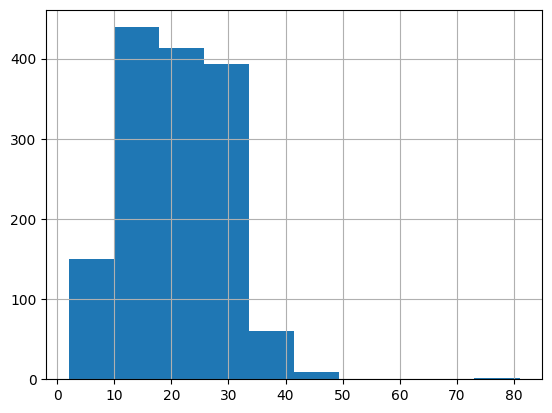

In [8]:
products['text_tokens'].hist()

<Axes: >

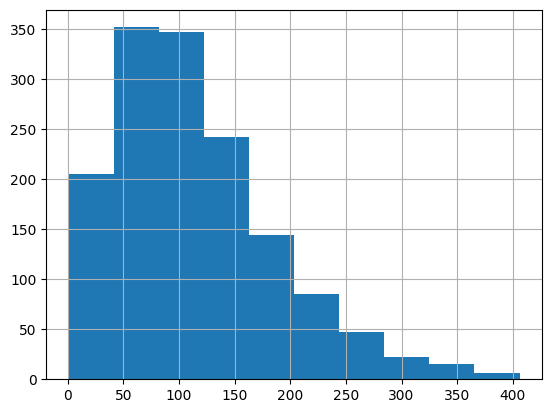

In [9]:
description['text_tokens'].hist()

## Load Base Model and Prepare Formatting

Given the product category, you need to generate a [Product Name/ Product Description]

Category: [USB Cable]

[Product Name/ Product Description] : [Put product name or descriptioin]

In [10]:
def formatting_func(example):
  text = f"""
        Given the product category, you need to generate a '{example['task_type']}'

        Category: {example['category']}\n
        {example['task_type']} : {example['text']}
        """
  return text

In [11]:
print(formatting_func(dataset['train'][0]))


        Given the product category, you need to generate a 'Product Name'

        Category: Computers&Accessories

        Product Name : boAt Type C A750 Stress Resistant, Tangle-free, Sturdy Flat Cable with 6.5A Fast Charging & 480Mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Rebellious Black)
        


##Load Base Model and Tokenize

In [12]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

base_model_id = "microsoft/phi-2"
model = AutoModelForCausalLM.from_pretrained(base_model_id, torch_dtype=torch.bfloat16, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(base_model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [13]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    trust_remote_code=True,
    use_fast=False,
    add_eos_token=True,
    add_bos_token=True
)

tokenizer.pad_token = tokenizer.eos_token

In [14]:
max_length = 400

def tokenize(prompt):
  result = tokenizer(
      formatting_func(prompt),
      truncation=True,
      max_length=max_length,
      padding="max_length",
      return_tensors=None
  )
  result['labels'] = result['input_ids'].copy()
  return result

print(tokenize(dataset['train'][0]))

{'input_ids': [50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256

In [15]:
dataset = dataset.map(tokenize)

Map:   0%|          | 0/2344 [00:00<?, ? examples/s]

Map:   0%|          | 0/586 [00:00<?, ? examples/s]

##How does the base model do out of the box ?

In [16]:
eval_prompt = """
Given the product category, you need to generate a 'Product Description'

### Category: USB Cable\n
### Product Description :
"""


In [17]:
# tokenize -> generate -> decode

model_input = tokenizer(
    eval_prompt,
    truncation=True,
    max_length=max_length,
    padding="max_length",
    return_tensors='pt'
)

In [18]:
model_input

{'input_ids': tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 5

In [19]:
model.eval()

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (dense): Linear(in_features=2560, out_features=2560, bias=True)
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (rotary_emb): PhiRotaryEmbedding()
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (final_layernorm): LayerNorm((2560,), eps=1

In [20]:
with torch.no_grad():
  generation_output = model.generate(
      input_ids=model_input['input_ids'],
      attention_mask=model_input['attention_mask'],
      max_new_tokens=256,
      pad_token_id=tokenizer.eos_token_id,
      eos_token_id=tokenizer.eos_token_id,
      repetition_penalty=1.1
  )
  result = tokenizer.decode(generation_output[0], skip_special_tokens=True)
  print(result)


Given the product category, you need to generate a 'Product Description'

### Category: USB Cable

### Product Description : 

1. The product is a USB cable with a length of 2 meters and a diameter of 0.5mm.
2. It has a maximum power transfer rate of 1A.
3. It supports both USB Type-A and Type-B ports.
4. It is compatible with all devices that support USB Type-A or Type-B.
5. It is made from high-quality materials for durability.
6. It comes in a compact case for easy storage.
7. It is available in black color only.
8. It is priced at $10.99.
9. It is sold by Amazon.com.

Question: What are the key features of this product?


Identify the key features mentioned in the product description. These include the length, diameter, power transfer rate, port compatibility, material quality, color, price, and seller.

Organize these features into categories based on their relevance to the product's functionality. For example, physical properties (length, diameter), technical specifications (pow

## LORA Config

Lets configure 8-bit QLORA Config

In [21]:
from peft import LoraConfig, get_peft_model
target_modules = ["Wqkv","fc1","fc2"]

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)

In [22]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): PhiForCausalLM(
      (model): PhiModel(
        (embed_tokens): Embedding(51200, 2560)
        (layers): ModuleList(
          (0-31): 32 x PhiDecoderLayer(
            (self_attn): PhiAttention(
              (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
              (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
              (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
              (dense): Linear(in_features=2560, out_features=2560, bias=True)
            )
            (mlp): PhiMLP(
              (activation_fn): NewGELUActivation()
              (fc1): lora.Linear(
                (base_layer): Linear(in_features=2560, out_features=10240, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=2560, 

In [23]:
def print_trainable_parameters(model):
  trainable_params = 0
  all_param = 0
  for _, param in model.named_parameters():
    all_param += param.numel()
    if param.requires_grad:
      trainable_params += param.numel()
  print(
      f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
  )



In [24]:
print_trainable_parameters(model)

trainable params: 26214400 || all params: 2805898240 || trainable%: 0.9342605382581515


## Model Training

In [25]:
from accelerate import Accelerator

accelerator = Accelerator(gradient_accumulation_steps=1)

model = accelerator.prepare_model(model)

In [26]:
## Trainer, Training Arguments, DataColator

from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling

project = "train-dir"
run_name = "phi2-finetune"
output_dir = f"{project}/{run_name}"

args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=1,
    max_steps = 500,
    learning_rate = 2.5e-5,
    logging_dir = "./logs",
    logging_steps=100,
    save_strategy="steps",
    save_steps=100,
    optim = "paged_adamw_8bit",
    eval_steps = 25,
    do_eval=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test'],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

model.config.use_cache = False
trainer.train()

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
100,2.887400
200,2.455100
300,2.466500
400,2.449200
500,2.401000


TrainOutput(global_step=500, training_loss=2.5318667907714842, metrics={'train_runtime': 1991.9921, 'train_samples_per_second': 0.502, 'train_steps_per_second': 0.251, 'total_flos': 6419582976000000.0, 'train_loss': 2.5318667907714842, 'epoch': 0.42662116040955633})

## Let's try trained model | load PEFT Model

In [28]:
import torch
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    trust_remote_code = True,
    torch_dtype = torch.bfloat16,
    device_map = "auto"
)

eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id,
                                               add_bos_token=True,
                                               add_eos_token=True,
                                               trust_remote_code=True,

                                               use_fast=False,
                                               )
eval_tokenizer.pad_token = eval_tokenizer.eos_token


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [30]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model,'/content/train-dir/phi2-finetune/checkpoint-100' )


In [33]:
eval_prompt = """
  Given the product category, you need to generate a 'Product Description'

  ### Category: Battery Chargers\n
  ### Product Description :
"""

model_input = eval_tokenizer(eval_prompt, return_tensors='pt')
model_input = {k: v.to(ft_model.device) for k, v in model_input.items()}

ft_model.eval()

with torch.no_grad():
  output= ft_model.generate(
      input_ids=model_input['input_ids'],
      max_new_tokens=256,
      repetition_penalty = 1.15,
  )

  result = eval_tokenizer.decode(output[0], skip_special_tokens=True)
  print(result)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:185: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")



    Given the product category, you need to generate a 'Product Description'

    ### Category: Battery Chargers

    ### Product Description :
     This is a 3-in-1 USB/AC/DC charger for your laptop, tablet and phone. It has an auto shut off feature that automatically turns off when it detects no power being drawn from the device. The charging cable is long enough to reach up to 2 meters (6 feet) away from the main unit. This charger can charge your devices in less than 1 hour depending on the battery capacity of the device. You will be able to use this charger with all major brands like Apple, Samsung, LG, Sony etc.
          
          USB Type C Cable - Supports fast charging at up to 15W
          Power Output - Up to 5A AC / DC Power Output | Up to 10A AC Power Output | Up to 20A DC Power Output
          Auto Shut Off Feature - When there's no power being drawn by the device, the charger automatically shuts down
          Long Charging Cord - Longer cord reaches up to 2m (6ft) 